<a href="https://colab.research.google.com/github/JJungEEun/Optimization_of_DemandResponseBus_Routes/blob/main/%EC%A0%95%EB%A5%98%EC%9E%A5_%EC%8A%B9%ED%95%98%EC%B0%A8_%EC%83%81%EC%9C%84_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
trans = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_가장 많이 이용하는 교통수단_20191231.csv",encoding='cp949')
s_pass = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_정류장별 이용승객 현황_20220430.csv", encoding='cp949')

In [ ]:
s_pass

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수
0,중구,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55
1,중구,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75
2,미추홀구,(구)시민회관사거리,37319.0,7866,56698,7732,56698,134,2152
3,미추홀구,(구)시민회관사거리,37326.0,78529,16782,77529,16782,1000,3177
4,서구,(구)신현주공,42228.0,4540,5758,4347,5758,193,343
...,...,...,...,...,...,...,...,...,...
6347,남동구,힐캐슬프라자,39331.0,15618,8417,15238,8417,380,801
6348,연수구,힘찬병원,38126.0,3898,6105,3844,6105,54,333
6349,연수구,힘찬병원,38129.0,5727,4091,5569,4091,158,327
6350,부평구,힘찬병원,40891.0,4926,6564,4876,6564,50,383


In [ ]:
busstop = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_시내버스 정류소 현황_20220516.csv",encoding='cp949')
busstop

,기준일자,정류소 명,정류소 번호,정류소 ID,권역,행정동 명,X 좌표,위도,Y 좌표,경도
0,2022-05-16,(구)국제여객터미널,35052.0,161000052,중구,연안동,164354.2093,126.597932,438993.8440,37.452415
1,2022-05-16,(구)국제여객터미널,35051.0,161000051,중구,연안동,164336.1312,126.597726,439026.3601,37.452707
2,2022-05-16,(구)시민회관사거리,37319.0,163000319,미추홀구,주안4동,171634.3433,126.680188,439514.7790,37.457360
3,2022-05-16,(구)시민회관사거리,37326.0,163000326,미추홀구,주안2동,171611.3811,126.679927,439559.9220,37.457766
4,2022-05-16,(구)신현주공,42228.0,168000228,서구,가정1동,171058.1950,126.673395,446673.6356,37.521843
...,...,...,...,...,...,...,...,...,...,...
6852,2022-05-16,힐캐슬프라자,39331.0,165000331,남동구,구월2동,174638.7810,126.714149,439413.5819,37.456536
6853,2022-05-16,힘찬병원,40892.0,166000892,부평구,부평5동,176023.4600,126.729670,443373.0198,37.492247
6854,2022-05-16,힘찬병원,38126.0,164000126,연수구,연수2동,171438.8895,126.678164,434749.4123,37.414419
6855,2022-05-16,힘찬병원,40891.0,166000891,부평구,부평5동,176052.8411,126.730001,443392.6072,37.492425


In [ ]:
bus_yj = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/중구버스2.csv",encoding='UTF8')
bus_yj 

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,정류장수
0,중구,KT인천공항지사,35095,324,84,314,84,10,14,1
1,중구,KT인천공항지사,35109,7863,2975,7372,2975,491,361,1
2,중구,LH1단지,35494,6547,3316,6404,3316,143,329,1
3,중구,LH1단지,35495,3115,4109,2970,4109,145,241,1
4,중구,LH49단지행복주택아파트,35768,494,715,491,715,3,40,1
...,...,...,...,...,...,...,...,...,...,...
422,중구,화물터미널,35040,185,1,185,1,0,6,1
423,중구,화성파크드림.스카이시티자이,35651,5799,1843,5717,1843,82,255,1
424,중구,화성파크드림후문.한라비발디,35659,591,824,577,824,14,47,1
425,중구,힐스테이트,35457,15180,9868,14960,9868,220,835,1


###  Merge Data

In [ ]:
busstop['정류소ID'] = busstop['정류소 번호']

In [ ]:
data = pd.merge(s_pass, busstop, on ='정류소ID')[['권역_x', '행정동 명', '정류소명', '정류소ID', '승차건수(총합계)', '하차건수(총합계)', '승차건수(카드)',
       '하차건수(카드)', '승차건수(현금)', '일평균 승하차건수','X 좌표', '위도', 'Y 좌표', '경도']]
data.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,연안동,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55,164336.1312,126.597726,439026.3601,37.452707
1,중구,연안동,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75,164354.2093,126.597932,438993.8440,37.452415
2,미추홀구,주안4동,(구)시민회관사거리,37319.0,7866,56698,7732,56698,134,2152,171634.3433,126.680188,439514.7790,37.457360
3,미추홀구,주안2동,(구)시민회관사거리,37326.0,78529,16782,77529,16782,1000,3177,171611.3811,126.679927,439559.9220,37.457766
4,서구,가정1동,(구)신현주공,42228.0,4540,5758,4347,5758,193,343,171058.1950,126.673395,446673.6356,37.521843


In [ ]:
data['행정동 명'].unique()

array(['연안동', '주안4동', '주안2동', '가정1동', '산곡3동', '오류왕길동', '가좌1동', '석남2동',
       '남촌도림동', '논현고잔동', '주안5동', '십정1동', '원찬동', '원창동', '일신동', '검단1동',
       '부평3동', '신현원창동', '송현3동', '만수3동', '도화23동', '북성동', '신흥동', '걸포동',
       '원당동', '불로대곡동', '청천2동', '송현1동2동', '영흥면', '만수4동', '주안1동', '당하동',
       '소하2동', '산곡4동', '연희동', '옥련1동', '길상면', '운서동', '주안6동', '만수5동', '중1동',
       '검암경서동', '영종동', '장기동', '중산동', '용현2동', '청라3동', '용현5동', '석남1동',
       '송도4동', '효성2동', '효성1동', '영종1동', '운영동', '가정동', '불은면', '양도면', '가좌2동',
       '가양2동', '양촌면', '가좌4동', '가좌3동', '가정3동', '석남3동', '연수3동', '하점면',
       '간석2동', '간석4동', '간석1동', '구월2동', '간석3동', '간석동', '화도면', '갈산2동',
       '삼산1동', '갈산1동', '계양1동', '강화읍', '역삼1동', '서초2동', '양사면', '송월동',
       '방화제2동', '방화2동', '운북동', '용유동', '만수1동', '동춘1동', '북변동', '아라동', '마전동',
       '대곡동', '선원면', '감정동', '산곡2동', '청라2동', '계산2동', '계산1동', '학익1동',
       '송도2동', '부개1동', '계산3동', '계산동', '작전서운동', '계산4동', '계양3동', '작전2동',
       '계양2동', '작전1동', '귤현동', '교동면', '내가면', '반포3동', '김포2동', '고촌면', '정왕4동',
    

In [ ]:
data1 = data[ data['행정동 명']== '운서동']
data2 = data[ data['행정동 명']== '영종동']
data3 = data[ data['행정동 명']== '중산동'] 
data4 = data[ data['행정동 명']== '영종1동']

In [ ]:
print(f'data1: {data1.shape}, data2: {data2.shape}, data3: {data3.shape}, data4: {data4.shape}')

data1: (64, 14), data2: (231, 14), data3: (14, 14), data4: (5, 14)


In [ ]:
64+ 231 + 14 + 5

314

In [ ]:
bus_yj_ = pd.concat([data1, data2, data3, data4])
data.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,연안동,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55,164336.1312,126.597726,439026.3601,37.452707
1,중구,연안동,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75,164354.2093,126.597932,438993.8440,37.452415
2,미추홀구,주안4동,(구)시민회관사거리,37319.0,7866,56698,7732,56698,134,2152,171634.3433,126.680188,439514.7790,37.457360
3,미추홀구,주안2동,(구)시민회관사거리,37326.0,78529,16782,77529,16782,1000,3177,171611.3811,126.679927,439559.9220,37.457766
4,서구,가정1동,(구)신현주공,42228.0,4540,5758,4347,5758,193,343,171058.1950,126.673395,446673.6356,37.521843


In [ ]:
bus_yj_.columns

Index(['권역_x', '행정동 명', '정류소명', '정류소ID', '승차건수(총합계)', '하차건수(총합계)', '승차건수(카드)',
       '하차건수(카드)', '승차건수(현금)', '일평균 승하차건수', 'X 좌표', '위도', 'Y 좌표', '경도'],
      dtype='object')

### 정류장 접근성 확인

In [ ]:
bus_yj_['정류장수'] = 1
bus_yj =  bus_yj_.groupby(['정류소명'])['승차건수(총합계)','하차건수(총합계)','일평균 승하차건수','정류장수'].sum()
bus_yj['승하차건수(총합계)'] = bus_yj['승차건수(총합계)']+ bus_yj['하차건수(총합계)']
bus_yj = bus_yj.reset_index()
bus_yj

,정류소명,승차건수(총합계),하차건수(총합계),일평균 승하차건수,정류장수,승하차건수(총합계)
0,KT인천공항지사,8187,3059,375,2,11246
1,LH1단지,9662,7425,570,2,17087
2,LH49단지행복주택아파트,1661,1502,105,2,3163
3,LH7단지,5247,5158,347,2,10405
4,e편한세상1차(정문),2381,1657,134,2,4038
...,...,...,...,...,...,...
185,호수마을5단지후문,16,43,2,1,59
186,화물터미널,185,254,14,2,439
187,화성파크드림.스카이시티자이,5799,1843,255,1,7642
188,화성파크드림후문.한라비발디,591,824,47,1,1415


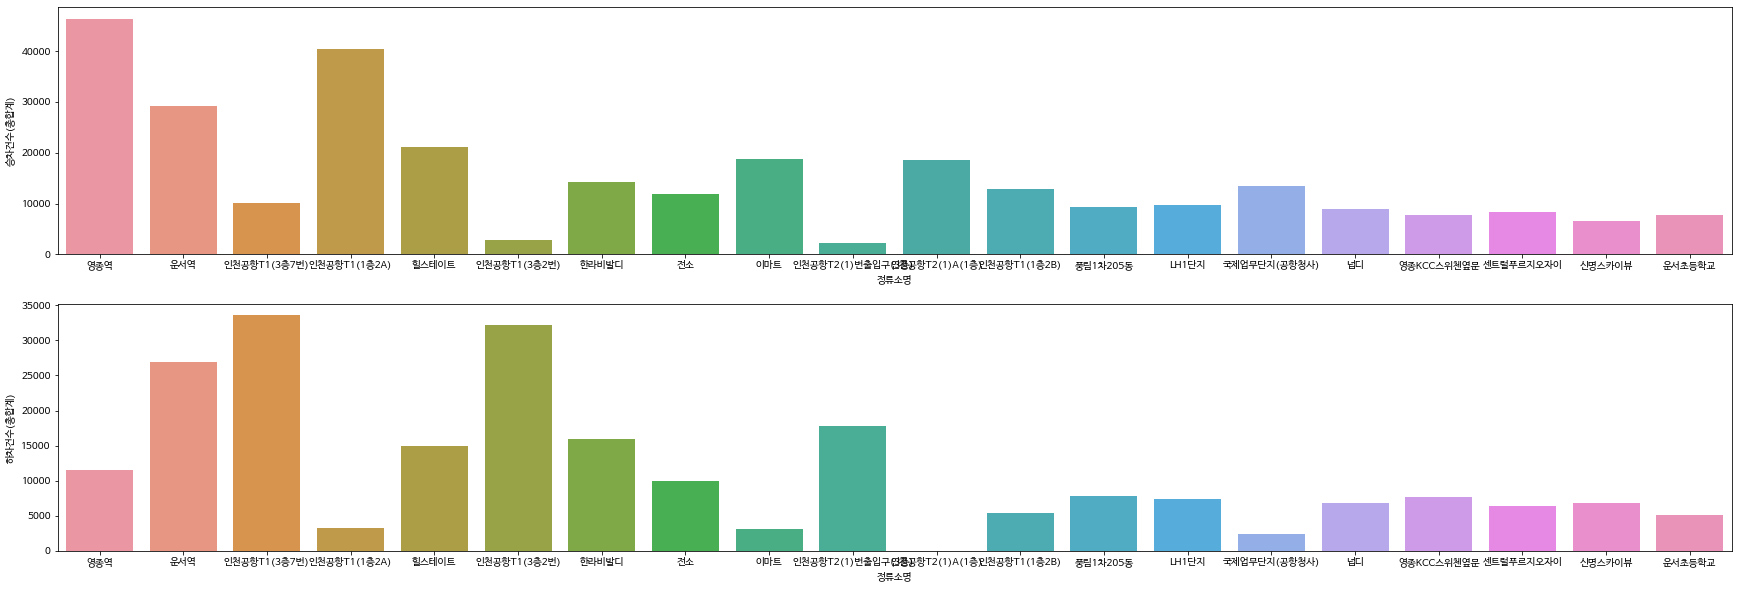

In [ ]:
col_n = 1
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))
data= bus_yj.sort_values('승하차건수(총합계)', ascending=False)[:20]

col = ["승차건수(총합계)","하차건수(총합계)"]
for i,col in enumerate(data[col]): 
  sns.barplot(x=data["정류소명"], y=data[col], ax=ax[int(i)])

### 정류장 승하차 상위 20

In [ ]:
top20_up = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("무의도", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("인천출입국", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("공항청사", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("이마트", na=False, case=False)]


top20_up = top20_up.sort_values('승차건수(총합계)', ascending=False)[:20]
top20_up = top20_up.reset_index(drop=True)
top20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,영종역,35566.0,33040,598,32604,598,436,1121,157859.8240,126.524154,445680.9062,37.512390,1
1,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938,1
2,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848,1
3,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124,1
4,중구,영종동,한라비발디,35459.0,7515,2638,7350,2638,165,338,161210.9943,126.562183,443285.9022,37.490958,1
5,중구,영종동,넙디,35575.0,7254,1430,7121,1430,133,289,156345.5068,126.507207,442628.7298,37.484820,1
6,중구,영종1동,영종KCC스위첸옆문,35756.0,7252,512,7162,512,90,259,160405.3825,126.553058,443573.7473,37.493517,1
7,중구,운서동,운서역,35257.0,7156,14073,6997,14073,159,708,155092.7930,126.492980,443671.0824,37.494151,1
8,중구,운서동,풍림1차205동,35256.0,7064,3373,6979,3373,85,348,154199.4697,126.482873,443776.4093,37.495056,1
9,중구,영종동,한라비발디,35460.0,6640,13328,6421,13328,219,666,161252.7823,126.562660,443197.3821,37.490163,1


In [ ]:
top20_down = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("무의도", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("을왕리", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("인천출입국", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("하얏트호텔", na=False, case=False)]

top20_down = top20_down.sort_values('하차건수(총합계)', ascending=False)[:20]
top20_down = top20_down.reset_index(drop=True)
top20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,운서동,운서역,35257.0,7156,14073,6997,14073,159,708,155092.7930,126.492980,443671.0824,37.494151,1
1,중구,영종동,한라비발디,35460.0,6640,13328,6421,13328,219,666,161252.7823,126.562660,443197.3821,37.490163,1
2,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938,1
3,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124,1
4,중구,영종동,영종역(청라행),35620.0,62,10230,62,10230,0,343,157830.5372,126.523824,445653.1447,37.512138,1
5,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848,1
6,중구,영종1동,영종KCC스위첸옆문,35755.0,564,7182,537,7182,27,258,160349.4902,126.552426,443570.4285,37.493485,1
7,중구,영종동,스카이시티자이.화성파크드림,35650.0,1812,5823,1754,5823,58,255,161035.1710,126.560190,443388.6693,37.491877,1
8,중구,영종동,신명스카이뷰정문,35455.0,5648,5460,5522,5460,126,370,160856.4549,126.558202,442758.7104,37.486193,1
9,중구,영종동,넙디,35574.0,1603,5426,1570,5426,33,234,156321.7993,126.506940,442611.7960,37.484666,1


In [ ]:
import folium


#지도 띄우기
m1 = folium.Map([37.483563, 126.491371], zoom_start = 13)

coords = []
for i in range(len(top20_up)-1):
    x = top20_up['경도'][i]
    y = top20_up['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#008000',
        fill = 'crimson',
        popup = top20_up['정류소명'][i]
    ).add_to(m1)

In [ ]:
coords = []
for i in range(len(top20_down)-1):
    x = top20_down['경도'][i]
    y = top20_down['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
        popup = top20_down['정류소명'][i]
    ).add_to(m1)

In [ ]:
m1.save('/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안.html')
m1

### 정류장 승하차 하위 20

In [ ]:
down20_up = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("인하국제의료", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("파라다이스시티", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("한국도심공항", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("미정차", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("화물터미널", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("영종소방서", na=False, case=False)]


down20_up = down20_up.sort_values('승차건수(총합계)', ascending=True)[:20]
down20_up = down20_up.reset_index(drop=True)
down20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,금호어울림2차,35598.0,0,17,0,17,0,1,156276.0276,126.506439,442333.0048,37.482152,1
1,중구,운서동,운서SKVIEW 스카이시티,35781.0,0,6,0,6,0,0,155985.6987,126.503156,442352.1099,37.482311,1
2,중구,영종동,논골경로당 입구,35771.0,0,34,0,34,0,1,158876.5672,126.535630,446095.0806,37.516167,1
3,중구,영종동,잔다리삼거리,35856.0,0,5,0,5,0,0,159151.5573,126.538814,444772.4692,37.504263,1
4,중구,운서동,하늘문화센터입구,35766.0,0,71,0,71,0,2,153811.9093,126.478508,443485.7427,37.492418,1
5,중구,영종동,해송노인요양병원,35552.0,0,45,0,45,0,2,156815.2343,126.512306,446246.7624,37.517439,1
6,중구,영종동,젓개마을입구,35398.0,1,0,1,0,0,0,156484.5010,126.508635,445054.4700,37.506682,1
7,중구,영종동,영종성당.정도사,35850.0,1,17,1,17,0,1,160420.4005,126.553186,444363.0183,37.500629,1
8,중구,운서동,인천시교육청 교육연수원,35782.0,1,10,1,10,0,0,156242.8924,126.506008,443287.4985,37.490750,1
9,중구,운서동,체육공원앞,35605.0,1,326,1,326,0,11,153669.2946,126.476916,443163.9503,37.489512,1


In [ ]:
down20_down = bus_yj_[~bus_yj_['정류소명'].str.contains("인천국제공항", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("인천공항", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("화물터미널", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("인하국제", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("스태츠칩", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("미정차", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("물류단지", na=False, case=False)]

down20_down = down20_down.sort_values('하차건수(총합계)', ascending=True)[:20]
down20_down = down20_down.reset_index(drop=True)
down20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,젓개마을입구,35398.0,1,0,1,0,0,0,156484.5010,126.508635,445054.4700,37.506682,1
1,중구,영종동,금호어울림2차,35597.0,19,0,19,0,0,1,156308.9874,126.506811,442345.5439,37.482267,1
2,중구,영종동,영종주야간보호센터,35855.0,13,0,13,0,0,0,159748.6623,126.545585,444445.6155,37.501344,1
3,중구,운서동,운서SKVIEW 스카이시티,35780.0,2,0,2,0,0,0,155940.0611,126.502639,442368.5396,37.482457,1
4,중구,운서동,하늘문화센터,35827.0,33,1,33,1,0,1,153276.6477,126.472427,443936.7404,37.496454,1
5,중구,운서동,체육공원앞,35606.0,322,1,318,1,4,11,153685.8031,126.477101,443196.9672,37.489810,1
6,중구,영종동,잔다리삼거리,35857.0,2,1,2,1,0,0,159140.0251,126.538684,444763.6300,37.504183,1
7,중구,운서동,햇내로공원입구,35777.0,28,2,28,2,0,1,155834.0671,126.501346,443950.4248,37.496704,1
8,중구,영종동,가재우물터,35678.0,2,2,2,2,0,0,160485.8941,126.553884,445151.5163,37.507736,1
9,중구,영종동,예단포물양장,35622.0,84,2,83,2,1,3,155918.5580,126.502072,447761.9083,37.531048,1


In [ ]:
import folium


#지도 띄우기
m2 = folium.Map([37.483563, 126.491371], zoom_start = 13)

coords = []
for i in range(len(down20_up)-1):
    x = down20_up['경도'][i]
    y = down20_up['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#008000',
        fill = 'crimson',
        popup = down20_up['정류소명'][i]
    ).add_to(m2)

In [ ]:
coords = []
for i in range(len(down20_down)-1):
    x = down20_down['경도'][i]
    y = down20_down['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
        popup = down20_down['정류소명'][i]
    ).add_to(m2)

In [ ]:
m2.save('/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/down.html')
m2

### 정류장 승하차 조합(상위 20)

In [ ]:
upcol = top20_up['정류소명'][:10].unique()
downcol = top20_down['정류소명'][:10].unique()

In [ ]:
import itertools as it
import numpy as np

array = np.array([1, 2, 3])
array2 = np.array(['a','b','c'])


combinations = it.product(upcol, downcol)

for combination in combinations:
    print(combination)

('영종역', '운서역')
('영종역', '한라비발디')
('영종역', '영종역')
('영종역', '영종역(청라행)')
('영종역', '힐스테이트')
('영종역', '영종KCC스위첸옆문')
('영종역', '스카이시티자이.화성파크드림')
('영종역', '신명스카이뷰정문')
('영종역', '넙디')
('운서역', '운서역')
('운서역', '한라비발디')
('운서역', '영종역')
('운서역', '영종역(청라행)')
('운서역', '힐스테이트')
('운서역', '영종KCC스위첸옆문')
('운서역', '스카이시티자이.화성파크드림')
('운서역', '신명스카이뷰정문')
('운서역', '넙디')
('힐스테이트', '운서역')
('힐스테이트', '한라비발디')
('힐스테이트', '영종역')
('힐스테이트', '영종역(청라행)')
('힐스테이트', '힐스테이트')
('힐스테이트', '영종KCC스위첸옆문')
('힐스테이트', '스카이시티자이.화성파크드림')
('힐스테이트', '신명스카이뷰정문')
('힐스테이트', '넙디')
('한라비발디', '운서역')
('한라비발디', '한라비발디')
('한라비발디', '영종역')
('한라비발디', '영종역(청라행)')
('한라비발디', '힐스테이트')
('한라비발디', '영종KCC스위첸옆문')
('한라비발디', '스카이시티자이.화성파크드림')
('한라비발디', '신명스카이뷰정문')
('한라비발디', '넙디')
('넙디', '운서역')
('넙디', '한라비발디')
('넙디', '영종역')
('넙디', '영종역(청라행)')
('넙디', '힐스테이트')
('넙디', '영종KCC스위첸옆문')
('넙디', '스카이시티자이.화성파크드림')
('넙디', '신명스카이뷰정문')
('넙디', '넙디')
('영종KCC스위첸옆문', '운서역')
('영종KCC스위첸옆문', '한라비발디')
('영종KCC스위첸옆문', '영종역')
('영종KCC스위첸옆문', '영종역(청라행)')
('영종KCC스위첸옆문', '힐스테이트')
('영종KCC스위첸옆문', '영종KCC스위첸

In [ ]:
# https://velog.io/@choonsik_mom/Naver-API%EB%A1%9C-%EA%B8%B8%EC%B0%BE%EA%B8%B0with-python

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,653 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')